In [71]:
# reading from the file
import pandas as pd
df = pd.read_csv("wdbc.csv")
df

,Ob,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [72]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(3354354524)
#split the data into 80% training, 20% testing
train, test = train_test_split(df, test_size = 0.2,train_size = 0.8)
train=train.dropna()
test=test.dropna()
x_train = train.iloc[:,2:len(df.columns)]
x_test = test.iloc[:,2:len(df.columns)]
y_train = train.iloc[:,1]
y_test = test.iloc[:,1]

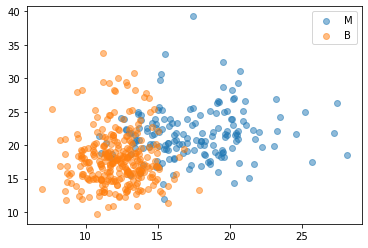

In [73]:
# 下面都是用train进行分析的
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
diagnosis= set(train["diagnosis"])
for s in diagnosis:
    sub = train[train["diagnosis"]==s]
    ax.scatter(sub["radius_mean"],
               sub["texture_mean"],
               label = s.split(" ")[0],
               alpha = 0.5)
plt.legend()

In [74]:
variables = ["radius_mean", "texture_mean"]
train.groupby("diagnosis")[variables].mean().round(3)

,radius_mean,texture_mean
diagnosis,,
B,12.176,17.961
M,17.467,21.611


In [5]:
#X = train.iloc[:,2:len(df.columns)]
#cor = X.corr()
# correlation plot.
#cor.style.background_gradient(cmap='coolwarm')

## (a). **Logistic Regression**

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

model1 = LogisticRegression()
model1.fit(x_train, y_train)
cv_score_train = cross_val_score(model1, x_train, y_train, cv=10).mean()
# accuracy rate
cv_score_train

0.9385024154589372

In [76]:
# confusion matrix
preds_test = model1.predict(x_test)
from sklearn.metrics import confusion_matrix
# confusion_matrix of train data and test data
confusion_matrix(preds_test, y_test)

array([[66,  3],
       [ 1, 44]], dtype=int64)

*The accuracy is 0.9385024154589372*

## (b). **KNN**

## (c). **Neural Networks**

In [79]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
df = df.iloc[:,1:len(df.columns)]
le = LabelEncoder()
# split x and y.
y = le.fit_transform(df["diagnosis"])
x = df.iloc[:,1:len(df.columns)].to_numpy()
x = np.array(x, dtype = np.float32)

In [80]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [81]:
x_train[:4] # first 4 rows of predictor data

array([[1.147e+01, 1.603e+01, 7.302e+01, 4.027e+02, 9.076e-02, 5.886e-02,
        2.587e-02, 2.322e-02, 1.634e-01, 6.372e-02, 1.707e-01, 7.615e-01,
        1.090e+00, 1.225e+01, 9.191e-03, 8.548e-03, 9.400e-03, 6.315e-03,
        1.755e-02, 3.009e-03, 1.251e+01, 2.079e+01, 7.967e+01, 4.758e+02,
        1.531e-01, 1.120e-01, 9.823e-02, 6.548e-02, 2.851e-01, 8.763e-02],
       [1.065e+01, 2.522e+01, 6.801e+01, 3.470e+02, 9.657e-02, 7.234e-02,
        2.379e-02, 1.615e-02, 1.897e-01, 6.329e-02, 2.497e-01, 1.493e+00,
        1.497e+00, 1.664e+01, 7.189e-03, 1.035e-02, 1.081e-02, 6.245e-03,
        2.158e-02, 2.619e-03, 1.225e+01, 3.519e+01, 7.798e+01, 4.557e+02,
        1.499e-01, 1.398e-01, 1.125e-01, 6.136e-02, 3.409e-01, 8.147e-02],
       [1.276e+01, 1.337e+01, 8.229e+01, 5.041e+02, 8.794e-02, 7.948e-02,
        4.052e-02, 2.548e-02, 1.601e-01, 6.140e-02, 3.265e-01, 6.594e-01,
        2.346e+00, 2.518e+01, 6.494e-03, 2.768e-02, 3.137e-02, 1.069e-02,
        1.731e-02, 4.392e-03, 1.419e

In [82]:
y_train[:4] # first 4 rows of target data

array([0, 0, 0, 1])

In [125]:
import tensorflow as tf
from tensorflow.keras import layers
# Let's do two "hidden" layers of 100 units each
model = tf.keras.models.Sequential([
    layers.Dense(100, input_shape = (30,), activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(30)
])

In [126]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               3100      
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 30)                3030      
                                                                 
Total params: 16,230
Trainable params: 16,230
Non-trainable params: 0
_________________________________________________________________


In [127]:
model(x_train[:4])

<tf.Tensor: shape=(4, 30), dtype=float32, numpy=
array([[ 2.37045174e+01, -1.07455956e+02, -6.49071045e+01,
         1.76122114e-01,  7.93225327e+01,  8.13565063e+01,
        -2.76534042e+01,  6.29675980e+01, -1.10617996e+02,
        -4.87198410e+01,  8.03000870e+01, -6.31032486e+01,
         1.30120041e+02,  1.03833130e+02, -3.21095734e+01,
        -4.61331892e+00,  5.72098351e+01, -3.18096485e+01,
         4.79541384e-02, -2.98622608e+01,  9.85026360e+00,
         2.36128826e+01,  8.23623562e+00,  3.55933189e+01,
        -3.52145348e+01,  4.79057198e+01,  1.64918564e+02,
        -9.18777237e+01,  1.34708595e+01, -2.47103024e+01],
       [ 2.16806660e+01, -9.32766037e+01, -5.78659706e+01,
         5.19438505e-01,  7.36994171e+01,  7.51693573e+01,
        -2.62454128e+01,  5.78530388e+01, -1.02693283e+02,
        -4.45699425e+01,  7.52932053e+01, -5.69689789e+01,
         1.18590706e+02,  9.52192459e+01, -3.35646172e+01,
        -2.18395090e+00,  5.38190918e+01, -2.82299805e+01,
      

In [128]:
# convert into probabilities
softmax = tf.keras.layers.Softmax()
softmax(model(x_train[:5]))

<tf.Tensor: shape=(5, 30), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.7006354e-38, 5.1222356e-37, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.7809938e-37, 0.0000000e+00,
        7.7124700e-16, 2.9575568e-27, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.2675443e-34, 5.5125180e-34, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 6.2393096e-34, 0.0000000e+00,
        3.9719348e-15, 2.8112927e-25, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.000

In [129]:
# ready for training!
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = "adam",
              loss = loss_fn,
              metrics = ["accuracy"])
# train them 100 times.
history = model.fit(x_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 172.1645 - accuracy: 0.2588
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 16.3294 - accuracy: 0.4523
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 7.3173 - accuracy: 0.5955
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 2.7242 - accuracy: 0.7739
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 1.1145 - accuracy: 0.9146
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7635 - accuracy: 0.8693
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.9146
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4744 - accuracy: 0.8869
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.9095
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.8869
Epoch 

13/13 [==============================] - 0s 1ms/step - loss: 0.2166 - accuracy: 0.9422
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.9397
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.9020
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1708 - accuracy: 0.9372
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2140 - accuracy: 0.9322
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8995
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.9146
Epoch 89/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9322
Epoch 90/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2284 - accuracy: 0.9372
Epoch 91/100
13/13 [==============================] - 0s 1ms/step - loss: 0.1889 - accuracy: 0.9372
Epoch 92/100


[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'training accuracy')]

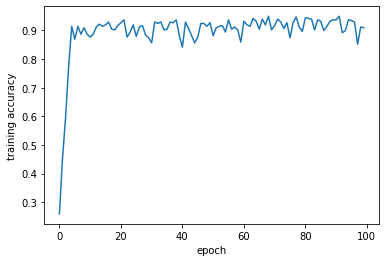

In [130]:
# plot the progress of the training over time:
plt.plot(history.history["accuracy"])
plt.gca().set(xlabel = "epoch", ylabel = "training accuracy")

In [131]:
model.evaluate(x_test, y_test, verbose = 2)

6/6 - 0s - loss: 0.2622 - accuracy: 0.9123 - 88ms/epoch - 15ms/step


[0.262172669172287, 0.9122806787490845]

*The accuracy is 0.9122806787490845*